<h1 style='color:#000000'> Should The Grizzly Bear Eat The Salmon?</h1>

<h2 style='color:#6698FF'> Table of Contents</h2>
<a name="TOC"></a> 

1.  [Libraries](#1)
2.  [Fishing Simulation Function](#2)   
    2.1.  [Simulation 1: 2 Hour Expedition](#3.1)  
    2.2.  [Simulation 2: 3 Hour Expedition](#3.2)  
    2.3.  [Simulation 2: 4 Hour Expedition](#3.3)  
3.  [Alternate Simulation](#4)   
    3.1.  [Simulation 1: 2 Hour Expedition](#3.1)  
    3.2.  [Simulation 1: 3 Hour Expedition](#3.2)  
    3.3.  [Simulation 1: 4-10 Hour Expedition3](#3.3)  

<a name="1" style='color:#6698FF'>
## Libraries

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline
# plt.style.use('ggplot')

<a name="2" style='color:#6698FF'>
## Fishing Simulation Function
[Back to Table of Contents](#TOC)

Function to simulate the bear's fishing expedition. Takes as input the number of iterations to runs and the number of hours the bear will spend fishing. Calculates the average total amount of fish a bear could expect to catch based on it's first catch and the number of hours it spends fishing.

In [24]:
def fishin(sims = 10000, hours = 2):
    total_fish_eaten = []
    first_fish_eaten = []
    
    #Simulate for the desired number of iterations
    for i in range(0,sims):
        
        #Initialize variables to 0
        total_fish = 0
        old_fish = 0
        new_fish = 0
        
        #For number of hours the bear spends fishing
        for j in range(0,hours):
            
            #If this is the first fish
            if j==0:    
                new_fish = random.random() #Randomly assign the weight of the first fish
                first_fish_eaten.append(new_fish) #Append to the array of first fish
                total_fish += new_fish #Add weight to total fish eaten
                
            #If not the first fish
            else:
                old_fish = max(new_fish,old_fish) #Set old fish to last fish eaten
                new_fish = random.random() #Randomly assign the weight of the next fish
                if new_fish >= old_fish: total_fish += new_fish #If heavier than the previous fish, eat

        #Append to the array of total fish eaten
        total_fish_eaten.append(total_fish)

    #Plot the weight of the first fish versus the total weight of fish eaten    
    plt.scatter(first_fish_eaten,total_fish_eaten,s=0.1,c="black")
    plt.xlabel("First Fish (kg)")
    plt.ylabel("Total Fish Eaten (kg)")
    plt.title("Weight of First Fish vs Total Fish Eaten: %i Hours" %(hours))
    plt.show()
    
    #Calculate the average total fish eaten by the weight of the first fish, binned into 0.01kg buckets
    total_fish_eaten_n = pd.DataFrame(total_fish_eaten,columns=["Total Fish"])
    first_fish_eaten_n = pd.DataFrame(first_fish_eaten,columns=["First Fish"])
    fish = pd.concat([first_fish_eaten_n, total_fish_eaten_n], axis=1)
    fish = fish.sort_values("First Fish").reset_index(drop=True)
    fish["First_Bin"] = fish["First Fish"].apply(lambda x: math.ceil(x*100)/100)
    temp = fish.groupby("First_Bin")["Total Fish"].mean().reset_index()
    
    #Plt the average weight eaten by weight of first fish
    plt.scatter(temp["First_Bin"],temp["Total Fish"])
    plt.xlabel("First Fish Binned (kg)")
    plt.ylabel("Mean of Total Fish Eaten (kg)")
    plt.title("Average Fish Eaten by Weight of First Fish: %i Hours" %(hours))
    plt.show()
    
    print "Max weight eaten is %0.2fkg, with a first fish weight of %0.2fkg." %(temp.max()[1],temp.iloc[temp.idxmax()[1]][0])

<a name="2.1">
### Simulation 1: 2 Hour Expedition, 1,000,000 Iterations
[Back to Table of Contents](#TOC)

For a 2 hour expedition, the bear can always increase his average expected fish consumption by taking the first fish. 

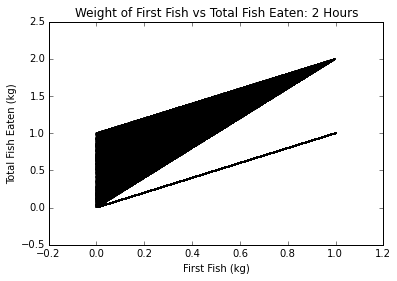

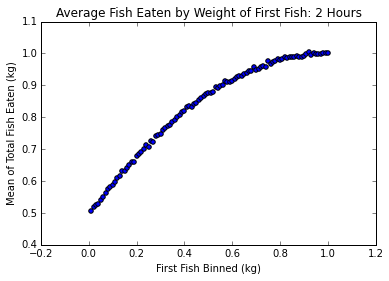

Max weight eaten is 1.00kg, with a first fish weight of 0.92kg.


In [28]:
fishin(1000000,2)

<a name="2.2">
### Simulation 2: 3 Hour Expedition, 1,000,000 Iterations
[Back to Table of Contents](#TOC)

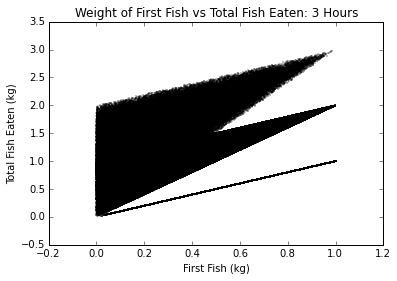

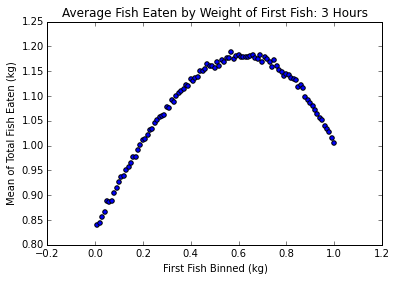

Max weight eaten is 1.19kg, with a first fish weight of 0.57kg.


In [27]:
fishin(1000000,3)

<a name="2.3">
### Simulation 3: 4 Hour Expedition, 1,000,000 Iterations
[Back to Table of Contents](#TOC)

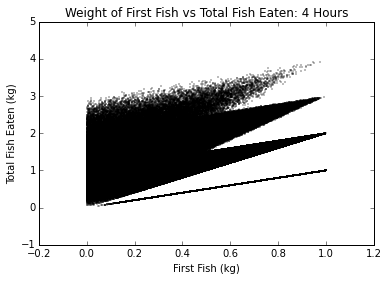

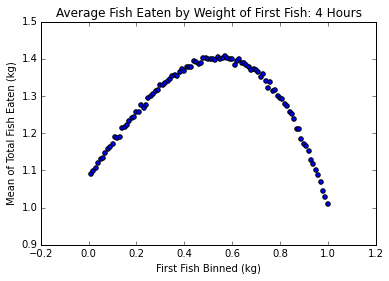

Max weight eaten is 1.41kg, with a first fish weight of 0.57kg.


In [31]:
fishin(1000000,4)

<a name="3" style='color:#6698FF'>
## Alternate Simulation Function
[Back to Table of Contents](#TOC)

The first simulation only detects the average weight if the bear takes the first fish, but not whether or not he should in fact take the fish. The following function compares the average expected weight of fish consumption if the bear takes the first fish versus taking the second fish. The point is to illustrate whether the lost weight of the first fish is more or less than the lost potential from future fish

In [101]:
def fishin2(sims = 10000, hours = 2):
    total_fish_eaten2 = []
    total_fish_eaten1 = []
    first_fish_eaten = []

    #Simulate for the desired number of iterations
    for i in range(0,sims):

        #Initialize variables to 0
        total_first_fish = 0
        total_second_fish = 0
        old_fish1 = 0
        old_fish2 = 0
        new_fish = 0

        #For number of hours the bear spends fishing
        for j in range(0,hours):

            #If this is the first fish
            if j==0:    
                new_fish = random.random() #Randomly assign the weight of the first fish
                first_fish_eaten.append(new_fish) #Append to the array of first fish
                total_first_fish += new_fish #Add weight to total fish eaten

            elif j==1:
                old_fish1 = max(new_fish,old_fish1) #Set old fish to last fish eaten
                new_fish = random.random() #Randomly assign the weight of the next fish
                total_second_fish += new_fish #Add weight to total fish eaten
                if new_fish >= old_fish1: total_first_fish += new_fish #If heavier than the previous fish, eat

            #If not the first fish
            else:
                old_fish1 = max(new_fish,old_fish1) #Set old fish to last fish eaten
                old_fish2 = max(new_fish,old_fish2) #Set old fish to last fish eaten
                new_fish = random.random() #Randomly assign the weight of the next fish
                if new_fish >= old_fish1: total_first_fish += new_fish #If heavier than the previous fish, eat
                if new_fish >= old_fish2: total_second_fish += new_fish #If heavier than the previous fish, eat

        #Append to the array of total fish eaten
        total_fish_eaten1.append(total_first_fish)
        total_fish_eaten2.append(total_second_fish)

    if hours<=3:
        #Plot the weight of the first fish versus the total weight of fish eaten    
        plt.scatter(first_fish_eaten,total_fish_eaten1,s=0.1,c="black")
        plt.xlabel("First Fish (kg)")
        plt.ylabel("Total Fish Eaten (kg)")
        plt.title("Total Fish Eaten with First Fish: %i Hours" %(hours))
        plt.show()

        #Plot the weight of the first fish versus the total weight of fish eaten    
        plt.scatter(first_fish_eaten,total_fish_eaten2,s=0.1,c="red")
        plt.xlabel("First Fish (kg)")
        plt.ylabel("Total Fish Eaten (kg)")
        plt.title("Total Fish Eaten with Second Fish: %i Hours" %(hours))
        plt.show()

    #Calculate the average total fish eaten by the weight of the first fish, binned into 0.01kg buckets
    total_fish_eaten_n1 = pd.DataFrame(total_fish_eaten1,columns=["Total Fish1"])
    total_fish_eaten_n2 = pd.DataFrame(total_fish_eaten2,columns=["Total Fish2"])
    first_fish_eaten_n = pd.DataFrame(first_fish_eaten,columns=["First Fish"])
    fish = pd.concat([first_fish_eaten_n, total_fish_eaten_n1,total_fish_eaten_n2], axis=1)
    fish = fish.sort_values("First Fish").reset_index(drop=True)
    fish["First_Bin"] = fish["First Fish"].apply(lambda x: math.ceil(x*100)/100)
    temp1 = fish.groupby("First_Bin")["Total Fish1"].mean().reset_index()
    temp2 = fish.groupby("First_Bin")["Total Fish2"].mean().reset_index()

    #Plt the average weight eaten by weight of first fish
    plt.scatter(temp1["First_Bin"],temp1["Total Fish1"],c='blue')
    plt.scatter(temp2["First_Bin"],temp2["Total Fish2"],c='red')
    plt.xlabel("First Fish Binned (kg)")
    plt.ylabel("Mean of Total Fish Eaten (kg)")
    plt.title("Average Fish Eaten by Weight of First Fish: %i Hours" %(hours))
    plt.show()

    temp3 = temp1.merge(temp2,on="First_Bin")
    try:
        Max_Weight = temp3[temp3["Total Fish2"]>temp3["Total Fish1"]].iloc(1)[0][0]
        print "The bear is better off skipping the first fish when it's weight is greater then %0.2fkg" %(Max_Weight)
    except:
        print "The bear is always better off taking the first fish."

<a name="3.1">
### Simulation 1: 2 Hour Expedition, 1,000,000 Iterations
[Back to Table of Contents](#TOC)

Again, for a 2 hour expedition, the bear can always increase his average expected fish consumption by taking the first fish. 

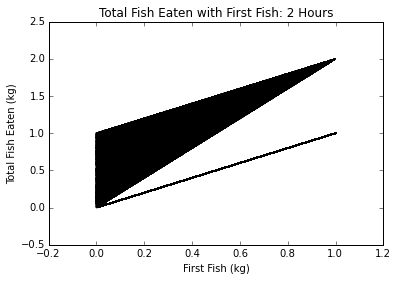

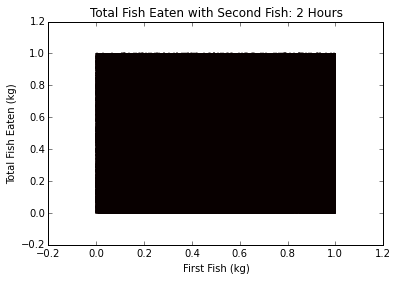

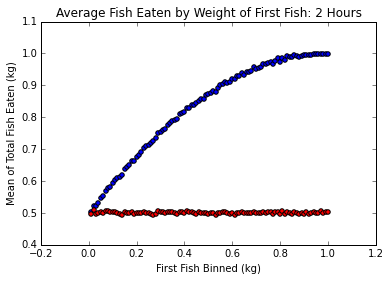

The bear is always better off taking the first fish.


In [103]:
fishin2(1000000,2)

<a name="3.2">
### Simulation 2: 3 Hour Expedition, 1,000,000 Iterations
[Back to Table of Contents](#TOC)

For a 3 hour expedition, the bears maximum expected consumption starts to drop, but he is still better off eating the first fish.

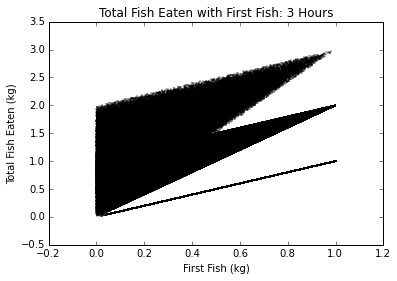

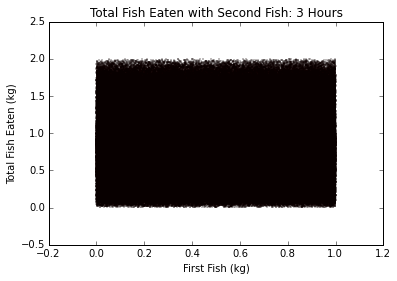

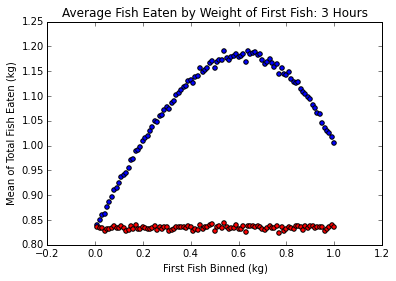

The bear is always better off taking the first fish.


In [104]:
fishin2(1000000,3)

<a name="3.3">
### Simulation 1: 4-10 Hour Expeditions, 1,000,000 Iterations
[Back to Table of Contents](#TOC)

After 4 hours, the bear starts to become better off by not taking the first fish. With each progressive hour, he's better off passing on more and more fish.

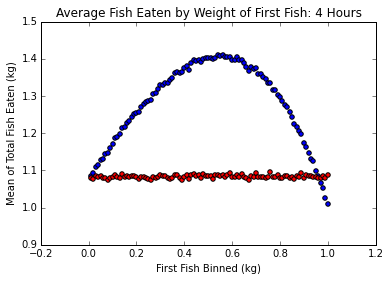

The bear is better off skipping the first fish when it's weight is greater then 0.97kg


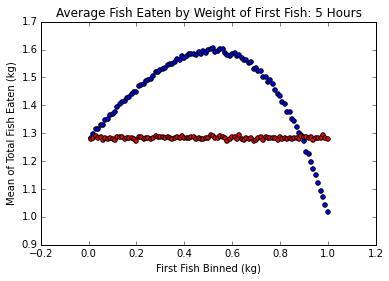

The bear is better off skipping the first fish when it's weight is greater then 0.90kg


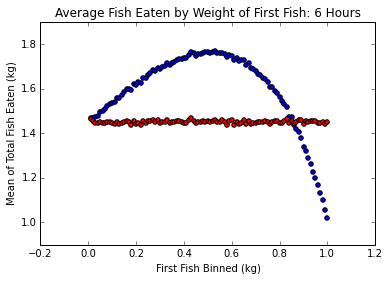

The bear is better off skipping the first fish when it's weight is greater then 0.86kg


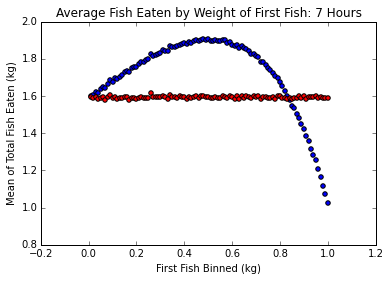

The bear is better off skipping the first fish when it's weight is greater then 0.84kg


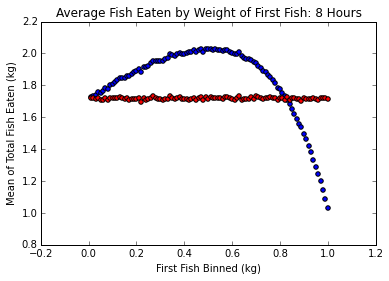

The bear is better off skipping the first fish when it's weight is greater then 0.83kg


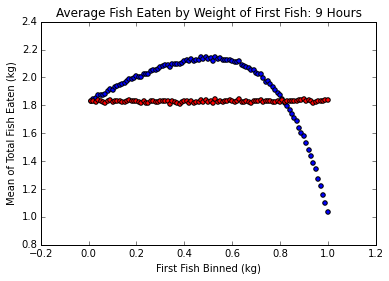

The bear is better off skipping the first fish when it's weight is greater then 0.82kg


In [106]:
for i in range(4,10):
    fishin2(1000000,i)